# 폐암 수술 환자의 생존율 예측하기 2

In [2]:
# 딥러닝을 구동하는데 필요한 케라스 함수 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# 필요한 라이브러리 불러옴
import numpy as np
import tensorflow as tf

In [4]:
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분
np.random.seed(3)
tf.random.set_seed(3)

In [5]:
# 준비된 수술 환자 데이터를 불러옴
Data_set = np.loadtxt('./data/ThoraricSurgery.csv', delimiter=",")

In [6]:
# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장
X = Data_set[:, 0:17]
Y = Data_set[:, 17]

In [7]:
# 딥러닝 구조를 결정
# 모델을 설정하고 실행하는 부분
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# 딥러닝 실행
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=100, batch_size=10)

Epoch 1/100
47/47 [==============================] - 1s 3ms/step - loss: 0.1485 - accuracy: 0.8426
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 0.1402 - accuracy: 0.8511
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 0.1433 - accuracy: 0.8489
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 0.1395 - accuracy: 0.8511
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 0.1386 - accuracy: 0.8468
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 0.1407 - accuracy: 0.8511
Epoch 7/100
47/47 [==============================] - 0s 3ms/step - loss: 0.1336 - accuracy: 0.8489
Epoch 8/100
47/47 [==============================] - 0s 3ms/step - loss: 0.1384 - accuracy: 0.8511
Epoch 9/100
47/47 [==============================] - 0s 4ms/step - loss: 0.1376 - accuracy: 0.8383
Epoch 10/100
47/47 [==============================] - 0s 3ms/step - loss: 0.1438 - accuracy: 0.8447
Epoch 11/

In [10]:
# 딥러닝 실행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=100, batch_size=10)

Epoch 1/100
47/47 [==============================] - 1s 3ms/step - loss: 0.4091 - accuracy: 0.8532
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4146 - accuracy: 0.8574
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3963 - accuracy: 0.8447
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4216 - accuracy: 0.8511
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.8681
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3832 - accuracy: 0.8574
Epoch 7/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4026 - accuracy: 0.8532
Epoch 8/100
47/47 [==============================] - 0s 3ms/step - loss: 0.3916 - accuracy: 0.8617
Epoch 9/100
47/47 [==============================] - 0s 3ms/step - loss: 0.3761 - accuracy: 0.8532
Epoch 10/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3918 - accuracy: 0.8617
Epoch 11/

# 피마 인디언의 당뇨병 예측하기

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf

In [15]:
# seed 값 생성
np.random.seed(3)
tf.random.set_seed(3)

**데이터 조사**  
* 샘플 수 : 768
* 속성 : 8
    - 정보1(pregnant) : 과거 임신 횟수
    - 정보2(plasma) : 포도당 부하 검사 2시간 후 공복 혈당 농도(mm Hg)
    - 정보3(pressure) : 확장기 혈합(mm Hg)
    - 정보4(thickness) : 삼두근 피부 주름 두께(mm)
    - 정보 5(insulin) : 혈청 인슐린(2-hour, mu U/ml)
    - 정보 6(BMI) : 체질량 지수(BMI, weight in kg/(heifht in m)^2)
    - 정보 7(predigree) : 당뇨병 가족력
    - 정보 8(age) : 나이
* 클래스 : 당뇨(1), 당뇨 아님(0)

In [22]:
import pandas as pd
df = pd.read_csv('./data/pima-indians-diabetes.csv')
df.columns = ['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class']
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [25]:
# 각 정보의 형식
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   767 non-null    int64  
 1   plasma     767 non-null    int64  
 2   pressure   767 non-null    int64  
 3   thickness  767 non-null    int64  
 4   insulin    767 non-null    int64  
 5   BMI        767 non-null    float64
 6   pedigree   767 non-null    float64
 7   age        767 non-null    int64  
 8   class      767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
# 각 정보별 샘플수, 평균, 표준편차, 최솟값, 백분위수(25%, 50%, 75%), 최댓값
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
df[['pregnant', 'class']]

,pregnant,class
0,1,0
1,8,1
2,1,0
3,0,1
4,5,0
...,...,...
762,10,0
763,2,0
764,5,0
765,1,1


In [29]:
# groupby() 함수를 사용해 pregnant 정보를 기준으로 하는 새 그룹을 만들고
# as_index=False는 pregnant 정보 옆에 새로운 인덱스를 만든다.
# mean() 함수를 사용해 평균을 구하고 
# sort_values() 함수를 써서 pregnant 컬럼을 오름차순으로 정리
df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.306122
7,7,0.555556
8,8,0.578947
9,9,0.642857


**matplotlib를 이용해 그래프로 표현하기**

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# 그래프의 크기를 결정
plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

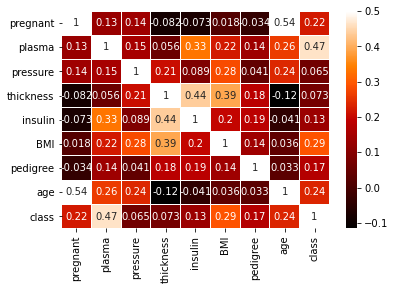

In [33]:
# heatmap() 함수는 두 항목씩 짝을 지은 뒤 각각 어떤 패턴으로 변화하는지를 관찰하는 함수
# vmax는 색상의 밝기를 조절하는 인자
# cmap은 미리 정해진 matplotlib 색상의 설정값을 불러온다
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

그래프를 통해 plasma 항목(공복 혈당 농도)이 class 항목과 가장 상관관계가 높다는 것을 알 수 있다.

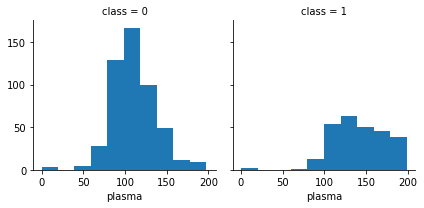

In [34]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

그래프를 통해 당뇨병 환자의 경우(class1) plasma 항목의 수치가 150 이상인 경우가 많다는 것을 알 수 있다.

In [35]:
# 데이터 로드
dataset = np.loadtxt('./data/pima-indians-diabetes.csv', delimiter=',')
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [36]:
# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
# 모델 컴파일
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200
77/77 [==============================] - 1s 2ms/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 2ms/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 2ms/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 2ms/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8896 - accuracy: 0.5000: 0s - loss: 0.9410 - accuracy: 0.
Epoch 6/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 2ms/step - loss: 

Epoch 163/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7643
Epoch 164/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7695
Epoch 165/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7591
Epoch 166/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7760
Epoch 167/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7721
Epoch 168/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7630
Epoch 169/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7721
Epoch 170/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7630
Epoch 171/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7669
Epoch 172/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4701 - accurac

In [38]:
print('Accuracy : %.4f' % (model.evaluate(X, Y)[1]))

24/24 [==============================] - 1s 2ms/step - loss: 0.4601 - accuracy: 0.7734
Accuracy : 0.7734


약 77.34%의 예측 정확도를 보인다

# 아이리스 품종 예측하기

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

### **데이터 정보**  
* 샘플 수 : 150
* 속성 : 4
    - 정보1(sepal_length) : 꽃받침 길이(cm)
    - 정보2(sepal_width) : 꽃받침 너비(cm)
    - 정보3(petal_length) : 꽃잎 길이(cm)
    - 정보4(petal_width) : 꽃잎 너비(cm)
* 클래스 : Iris-setosa, Iris-versicolor, Iris-virginica

In [7]:
# 데이터 입력
df = pd.read_csv('./data/iris.csv')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### **상관도 그래프**

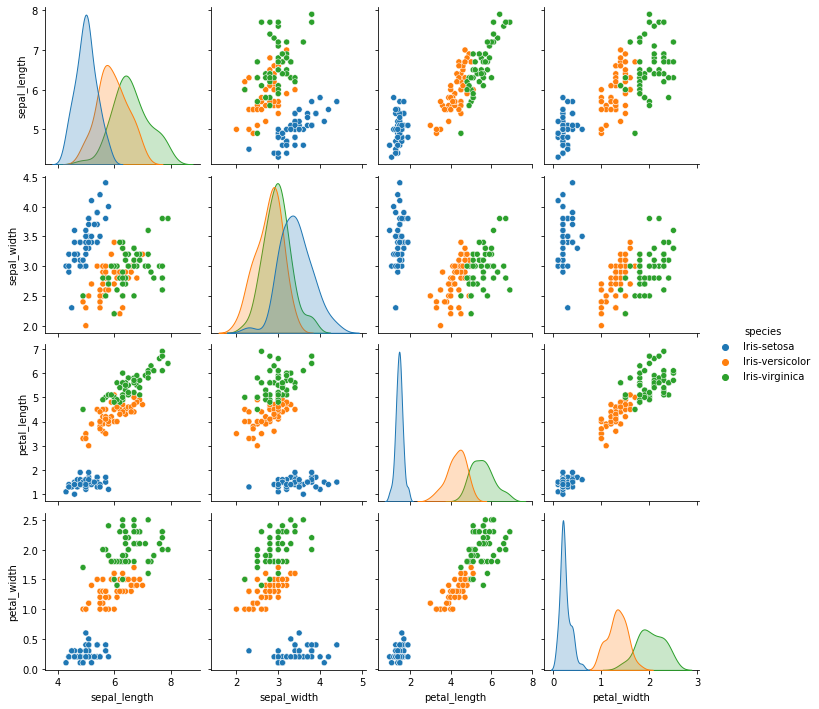

In [8]:
# 그래프 확인
sns.pairplot(df, hue='species')
plt.show()

In [9]:
# 데이터 분류
dataset = df.values
X = dataset[:, 0:4].astype(float)
Y_obj = dataset[:, 4] # 문자열 형태

### **원-핫 인코딩**

In [13]:
# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)
print(Y_encoded[0])

[1. 0. 0.]


### **모델 설정**

In [15]:
# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [16]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
# 모델 실행
model.fit(X, Y_encoded, epochs=50, batch_size=1)

Epoch 1/50
149/149 [==============================] - 1s 2ms/step - loss: 1.4444 - accuracy: 0.1141
Epoch 2/50
149/149 [==============================] - 0s 2ms/step - loss: 1.0738 - accuracy: 0.3691
Epoch 3/50
149/149 [==============================] - 0s 2ms/step - loss: 0.9070 - accuracy: 0.5034
Epoch 4/50
149/149 [==============================] - 0s 2ms/step - loss: 0.8024 - accuracy: 0.5705
Epoch 5/50
149/149 [==============================] - 0s 2ms/step - loss: 0.7101 - accuracy: 0.8389
Epoch 6/50
149/149 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.8188
Epoch 7/50
149/149 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.8859
Epoch 8/50
149/149 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.8792
Epoch 9/50
149/149 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.9195
Epoch 10/50
149/149 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.9060

In [18]:
# 결과 출력
print('Accuracy: %.4f' % (model.evaluate(X, Y_encoded)[1]))

5/5 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.9799
Accuracy: 0.9799
